Dataset: https://www.kaggle.com/mirichoi0218/insurance


Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Pre-processing

In [2]:
# loading dataset
insurance_data = pd.read_csv('/content/insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking the missing values in dataset
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


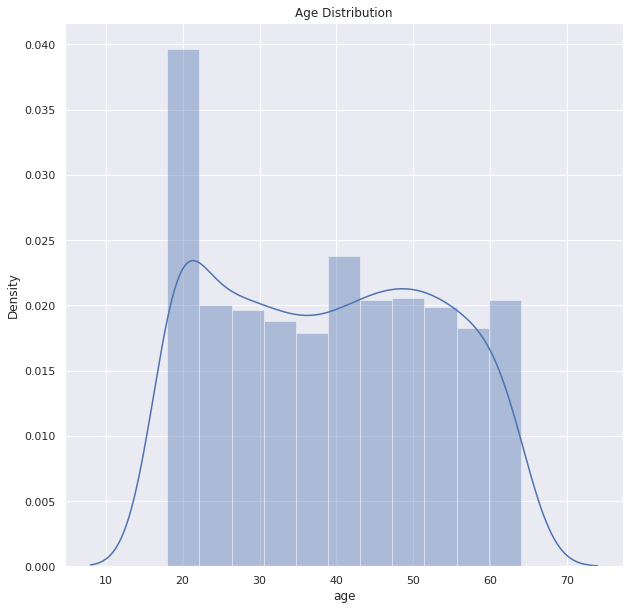

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(10, 10))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

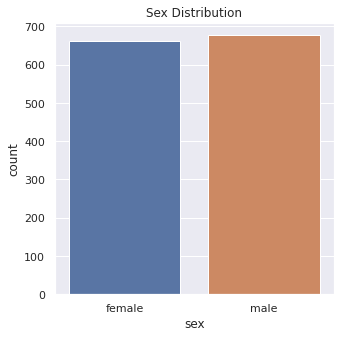

In [10]:
# Gender columns
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


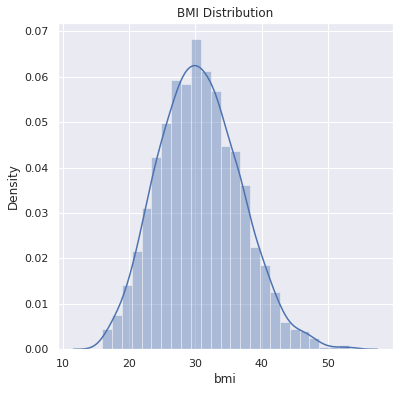

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data.bmi)
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

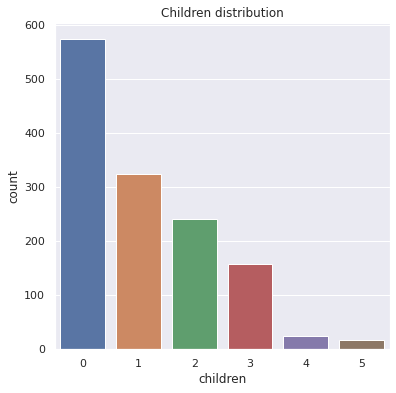

In [13]:
# childern columns
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children distribution')
plt.show()

In [14]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

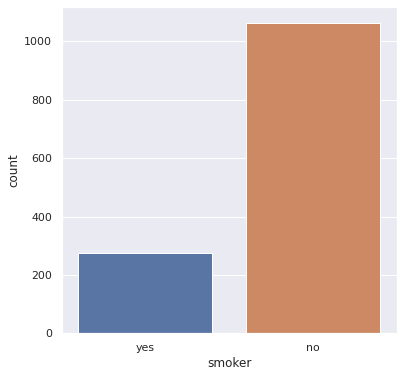

In [15]:
# Smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.show()

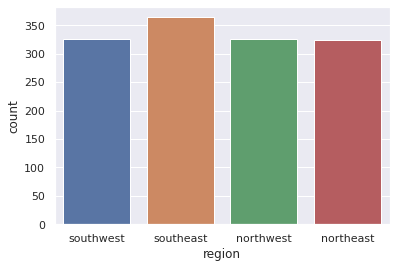

In [16]:
# region column
sns.countplot(x='region', data=insurance_data)

Encoding the categorical features

1. Sex
2. Smoker
3. Region

In [17]:
# encoding sex 
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region
insurance_data.replace({'region':{'southwest':0,'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [18]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [19]:
# splitting the feature and target
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [20]:
# splitting the training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

In [23]:
train_prediction = model.predict(X_train)
print(train_prediction)

[12924.27339003 32366.80465649 13740.14482981 ...  2814.27116126
  5380.6366549   5866.52342479]


In [24]:
r2_train = metrics.r2_score(Y_train, train_prediction)
print('R squared error on training data: ', r2_train)

R squared error on training data:  0.7530732192579027


In [25]:
# prediction on test data
test_prediction = model.predict(X_test)
print(test_prediction)

[ 8.04556701e+03  9.01377066e+03  1.38957815e+03  1.14587495e+04
  5.42376708e+03  1.23471634e+04  7.61730579e+03 -9.71334487e+02
  1.11392520e+04  3.15201336e+03  1.17448278e+04  1.27873010e+04
  7.65281783e+02  1.06999922e+04  9.31576863e+03  1.18140410e+04
  7.15504476e+03  3.28848994e+03  1.69626887e+03  1.14224393e+04
  1.12916918e+04  4.35813695e+03  6.77644717e+03  4.24321007e+03
  1.54500187e+04  1.16050691e+04  6.65931990e+03  6.78746441e+03
  5.10097821e+03  2.63242084e+03  1.82569422e+02  1.32103706e+04
  5.72821740e+03  2.62505630e+03  1.37802229e+03  3.60696757e+04
  6.70879848e+03  4.73302195e+03  2.05822443e+03  3.42996877e+03
  3.87429931e+03  2.44588871e+04  1.49528862e+03  2.64355981e+04
  3.35374677e+04  8.62509435e+03  1.06226384e+04  5.02339797e+03
  2.98294000e+03  2.97328948e+04  9.71733193e+03  3.26435940e+04
  2.21918833e+03  9.55667015e+03  3.67089837e+04  1.12847975e+04
  3.25606356e+04  4.75104978e+03  8.44387843e+03  1.71981648e+04
  3.31752980e+03  8.91984

In [26]:
r2_test = metrics.r2_score(Y_test, test_prediction)
print('R squared error on test data: ', r2_test)

R squared error on test data:  0.7406256738597919


Building a predictive system

In [29]:
input_data = (31,1,25.74,0,1,0)

# change to numpy array
input_numpy = np.asarray(input_data)

# reshape data as just for one instance
input_reshaped = input_numpy.reshape(1, -1)

prediction = model.predict(input_reshaped)
print(prediction)

print('The insurance cost in USD: ', prediction[0])

[3469.45345569]
The insurance cost in USD:  3469.4534556898434
